In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Memuat dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


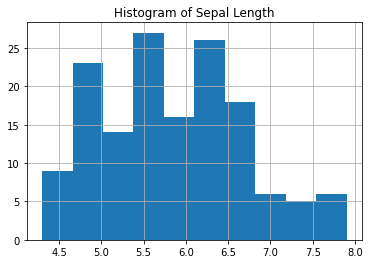

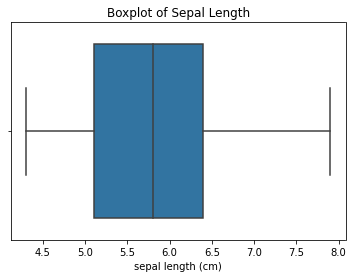

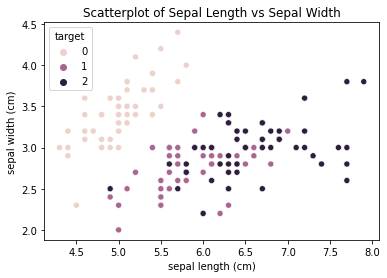

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
data[iris.feature_names[0]].hist()
plt.title('Histogram of Sepal Length')
plt.show()

# Boxplot
sns.boxplot(x=data[iris.feature_names[0]])
plt.title('Boxplot of Sepal Length')
plt.show()

# Scatterplot
sns.scatterplot(x=data[iris.feature_names[0]], y=data[iris.feature_names[1]], hue=data['target'])
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.show()

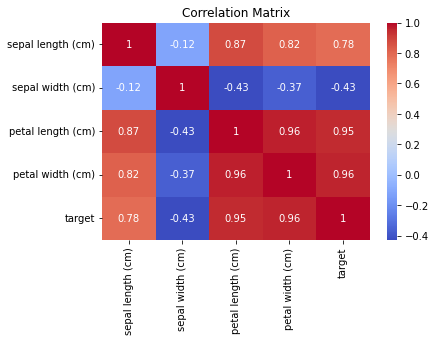

In [6]:
# Matriks Korelasi
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
from sklearn.impute import SimpleImputer

# Contoh imputasi
imputer = SimpleImputer(strategy='mean')
data[iris.feature_names] = imputer.fit_transform(data[iris.feature_names])

In [8]:
# Menghapus Outlier berdasarkan IQR
for feature in iris.feature_names:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisasi
scaler = MinMaxScaler()
data[iris.feature_names] = scaler.fit_transform(data[iris.feature_names])

In [10]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
encoder = OneHotEncoder()
encoded_target = encoder.fit_transform(data[['target']])

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)